S1 1.70478090489
S2 1.26609393972
C2 2.00042356911
Rg1 inf
Rg2 1.95996398454
Rg3 inf
Rg4 inf
Rg5 1.62836140672
Rg6 2.12804523418
Rg7 inf
Cand8 2.31875797098
Cand9 2.00042356911
Cand10 1.76882503852
Cand11 1.60675506897
Cand12 2.20041058121
Cand13 1.91450582506
Cand14 inf
Cand15 inf
Cand16 inf
Cand17 1.80274309074
Cand18 inf
NCand0 2.11438077153
NCand1 inf
NCand2 1.71845154339
NCand3 1.80274309074
NCand4 inf
NCand5 inf
NCand6 1.17976111761
NCand7 1.69062162958
NCand8 inf
NCand9 1.69062162958
NCand10 1.49415490862
NCand11 1.95996398454
NCand12 1.59321881802
NCand13 1.81864559285
NCand14 inf
NCand15 inf
NCand16 1.28155156554
NCand17 inf
NCand18 1.80274309074
NCand19 2.01908620058
NCand20 1.76882503852
NCand21 2.0699018309
NCand22 1.95996398454
NCand23 inf
NCand24 1.83391463582
NCand25 inf
NCand26 inf
NCand27 1.56472647136
NCand28 1.95996398454
NCand29 inf


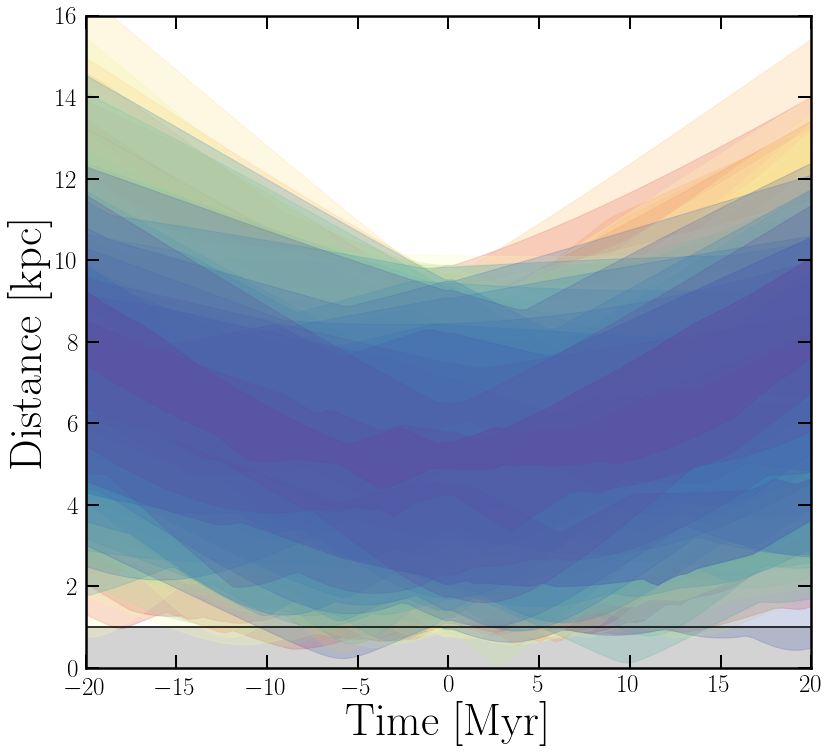

In [6]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
# Galpy
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014
from mpl_toolkits.mplot3d import Axes3D
from astropy import units
from skimage import measure
import cmocean


# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# # Candidate
df = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df.group_id.unique()
num_cands = size(names)


####


fig,ax = MySquarePlot('Time [Myr]','Distance [kpc]')

n_ex = 5
cols = cm.Spectral(linspace(0,1,num_cands))
sig_sun = zeros(shape=num_cands)
for i in range(0,num_cands):
    Cand = df.loc[df['group_id'] ==names[i]]
    orb_env,rsun,sig_sun[i],t = StreamOrbit(Cand,T_Myr=20.0)
    plt.fill_between(t,orb_env[0,:],y2=orb_env[3,:],color=cols[i,:],alpha=0.25,edgecolor=None)
    plt.fill_between(t,orb_env[2,:],y2=orb_env[1,:],color=cols[i,:],alpha=0.5,edgecolor=None)
    #plt.plot(t,orb_env[0,:],'--',lw=3,color=cols[i,:])
    #plt.plot(t,orb_env[1,:],'-',lw=3,color=cols[i,:])
    #plt.plot(t,orb_env[2,:],'-',lw=3,color=cols[i,:])
    #plt.plot(t,orb_env[3,:],'--',lw=3,color=cols[i,:])
    
    print names[i],sig_sun[i]

    
plt.xlim([t[0],t[-1]])
plt.ylim([0.0,16.0])
plt.plot([t[0],t[-1]],[1.0,1.0],'k-',)
plt.fill_between([t[0],t[-1]],[1.0,1.0],y2=0.0,lw=3,edgecolor='k',color='lightgray',zorder=-1)
plt.show()

In [4]:
shape(orb_env)

(4, 100)

nbins = 10
rbins = linspace(0,15.0,nbins+1)
rdist = zeros(shape=(nbins,nt))
for i in range(0,nt):
    h,rbins = histogram(rsun[:,i],bins=rbins)
    rdist[:,i] = h

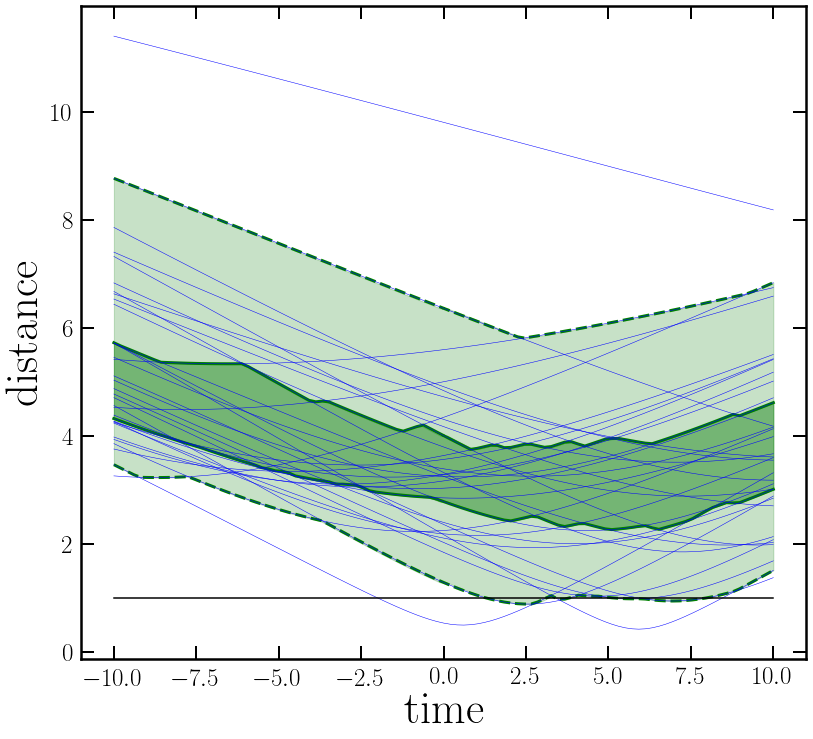

In [124]:
import cmocean
fig,ax = MySquarePlot('time','distance')

plt.fill_between(t,orb_env[3,:],y2=orb_env[4,:],color='ForestGreen',alpha=0.25,edgecolor=None)
plt.fill_between(t,orb_env[2,:],y2=orb_env[1,:],color='ForestGreen',alpha=0.5,edgecolor=None)
plt.plot(t,orb_env[0,:],'g--',lw=3)
plt.plot(t,orb_env[1,:],'g-',lw=3)
plt.plot(t,orb_env[2,:],'g-',lw=3)
plt.plot(t,orb_env[3,:],'g--',lw=3)
    
plt.plot([-T_Myr,T_Myr],[1.0,1.0],'k-')
plt.show()

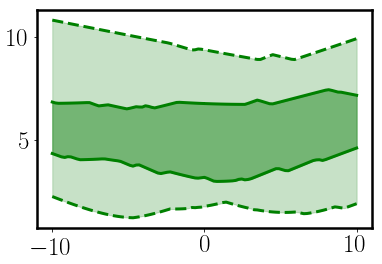

In [113]:
t = append(flipud(-ts),ts)
rsun_sorted = sort(rsun,0)
rsun1 = rsun_sorted[int((1-0.95)*nstars),:]
rsun2 = rsun_sorted[int((1-0.68)*nstars),:]
rsun3 = rsun_sorted[int(0.68*nstars),:]
rsun4 = rsun_sorted[int(0.95*nstars),:]
plt.fill_between(linspace(-T_Myr,T_Myr,nt),rsun4,y2=rsun1,color='ForestGreen',alpha=0.25,edgecolor=None)
plt.fill_between(linspace(-T_Myr,T_Myr,nt),rsun3,y2=rsun2,color='ForestGreen',alpha=0.5,edgecolor=None)
plt.plot(t,rsun1,'g--',lw=3)
plt.plot(t,rsun2,'g-',lw=3)
plt.plot(t,rsun3,'g-',lw=3)
plt.plot(t,rsun4,'g--',lw=3)

plt.show()

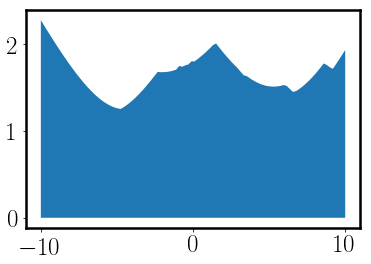

In [109]:
plt.fill_between(linspace(-T_Myr,T_Myr,nt),rsun1)
plt.show()

In [69]:
df_local = df.loc[isel]
df_local = df_local.reset_index()
df_local.to_csv('../data/Gaia-SDSS_highE_local.csv',float_format='%.8f',index=False)